In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3


# Importamos la base de datos desde Mi drive.

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
ruta_archivo = '/content/drive/MyDrive/yellow_tripdata_2023-01.parquet'

# Lee el archivo .parquet
df = pd.read_parquet(ruta_archivo)

# Muestra las primeras filas para verificar
print(df.head())

# Muestra información básica del DataFrame
print(df.info())

   ID_Proveedor Fecha_Hora_Recogida Fecha_Hora_Finalización  \
0             2 2023-01-01 00:32:10     2023-01-01 00:40:36   
1             2 2023-01-01 00:55:08     2023-01-01 01:01:27   
2             2 2023-01-01 00:25:04     2023-01-01 00:37:49   
3             1 2023-01-01 00:03:48     2023-01-01 00:13:25   
4             2 2023-01-01 00:10:29     2023-01-01 00:21:19   

   Cantidad_Pasajeros  Distancia_Viaje  ID_Tarifa Indicador_Almacenamiento  \
0                 1.0             0.97        1.0                        N   
1                 1.0             1.10        1.0                        N   
2                 1.0             2.51        1.0                        N   
3                 0.0             1.90        1.0                        N   
4                 1.0             1.43        1.0                        N   

   ID_Zona_Recogida  ID_Zona_Destino  Tipo_Pago  Monto_Tarifa  Costo_Extra  \
0               161              141          2           9.3         1.00

In [14]:
# Renombrar las columnas a español
df = df.rename(columns={
    'VendorID': 'ID_Proveedor',
    'tpep_pickup_datetime': 'Fecha_Hora_Recogida',
    'tpep_dropoff_datetime': 'Fecha_Hora_Finalización',
    'passenger_count': 'Cantidad_Pasajeros',
    'trip_distance': 'Distancia_Viaje',
    'RatecodeID': 'ID_Tarifa',
    'store_and_fwd_flag': 'Indicador_Almacenamiento',
    'PULocationID': 'ID_Zona_Recogida',
    'DOLocationID': 'ID_Zona_Destino',
    'payment_type': 'Tipo_Pago',
    'fare_amount': 'Monto_Tarifa',
    'extra': 'Costo_Extra',
    'mta_tax': 'Impuesto_MTA',
    'tip_amount': 'Monto_Propina',
    'tolls_amount': 'Monto_Peajes',
    'improvement_surcharge': 'Recargo_Mejora',
    'total_amount': 'Monto_Total',
    'congestion_surcharge': 'Recargo_Congestión',
    'airport_fee': 'Tarifa_Aeropuerto'
})
df.to_parquet('/content/drive/MyDrive/yellow_tripdata_2023-01.parquet')
# Verifica los nuevos nombres
print(df.head())
print(df.columns)

   ID_Proveedor Fecha_Hora_Recogida Fecha_Hora_Finalización  \
0             2 2023-01-01 00:32:10     2023-01-01 00:40:36   
1             2 2023-01-01 00:55:08     2023-01-01 01:01:27   
2             2 2023-01-01 00:25:04     2023-01-01 00:37:49   
3             1 2023-01-01 00:03:48     2023-01-01 00:13:25   
4             2 2023-01-01 00:10:29     2023-01-01 00:21:19   

   Cantidad_Pasajeros  Distancia_Viaje  ID_Tarifa Indicador_Almacenamiento  \
0                 1.0             0.97        1.0                        N   
1                 1.0             1.10        1.0                        N   
2                 1.0             2.51        1.0                        N   
3                 0.0             1.90        1.0                        N   
4                 1.0             1.43        1.0                        N   

   ID_Zona_Recogida  ID_Zona_Destino  Tipo_Pago  Monto_Tarifa  Costo_Extra  \
0               161              141          2           9.3         1.00

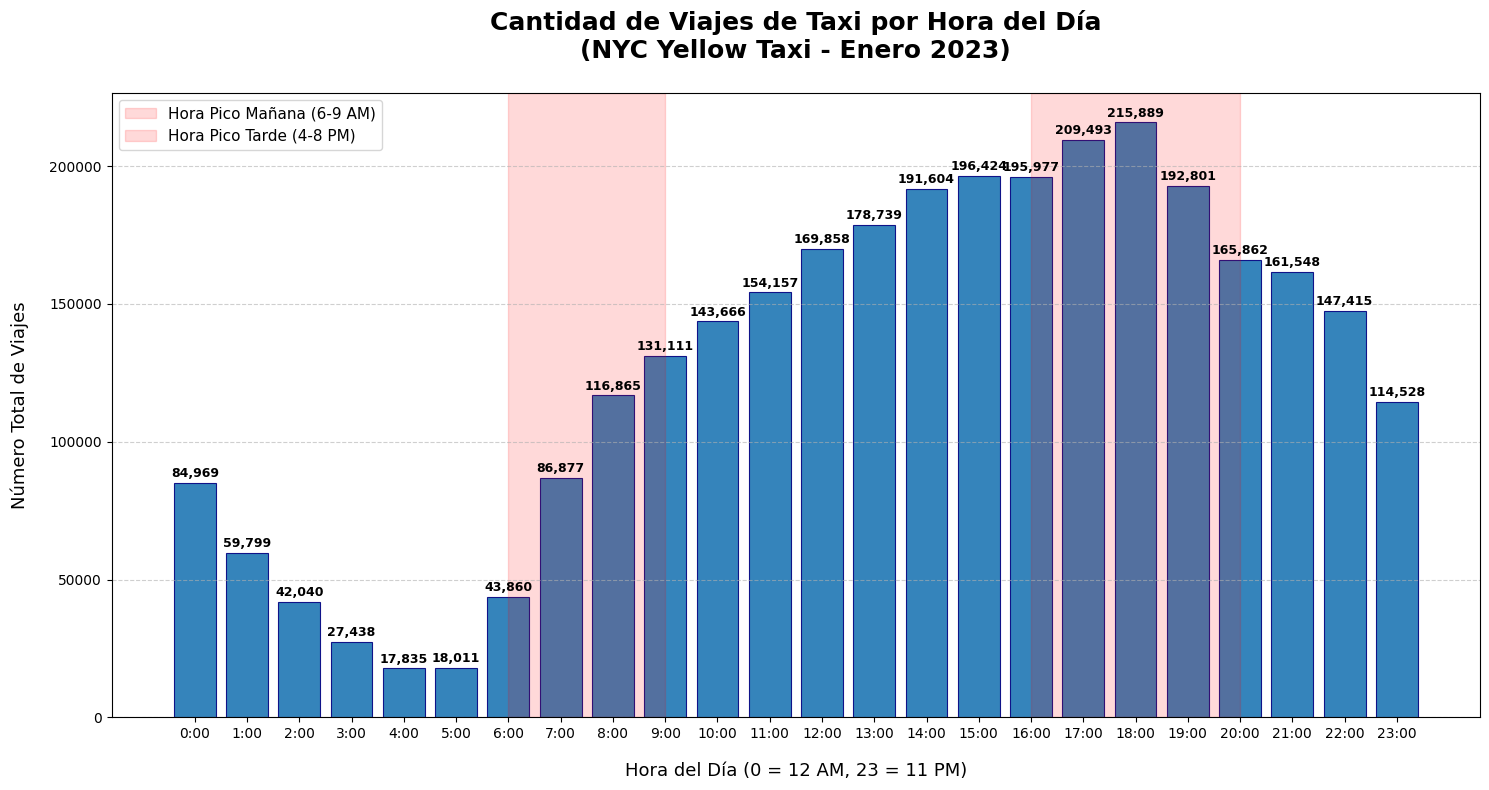

In [16]:
df['Hora_Recogida'] = df['Fecha_Hora_Recogida'].dt.hour
df['Día_Semana'] = df['Fecha_Hora_Recogida'].dt.day_name()

# === 2. GRÁFICO: VIAJES POR HORA (AHORA SÍ FUNCIONA) ===
viajes_por_hora = df.groupby('Hora_Recogida').size()
viajes_por_hora = viajes_por_hora.reindex(range(24), fill_value=0)

plt.figure(figsize=(15, 8))
bars = plt.bar(viajes_por_hora.index, viajes_por_hora.values,
               color='#1f77b4', edgecolor='navy', linewidth=0.8, alpha=0.9)

# Etiquetas con número de viajes
for i, bar in enumerate(bars):
    height = bar.get_height()
    if height > 0:
        plt.text(bar.get_x() + bar.get_width()/2, height + 1000,
                 f'{int(height):,}', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.title('Cantidad de Viajes de Taxi por Hora del Día\n(NYC Yellow Taxi - Enero 2023)',
          fontsize=18, fontweight='bold', pad=25)
plt.xlabel('Hora del Día (0 = 12 AM, 23 = 11 PM)', fontsize=13, labelpad=15)
plt.ylabel('Número Total de Viajes', fontsize=13, labelpad=15)
plt.xticks(ticks=range(24), labels=[f'{h}:00' for h in range(24)], rotation=0, fontsize=10)

# Horas pico
plt.axvspan(6, 9, color='red', alpha=0.15, label='Hora Pico Mañana (6-9 AM)')
plt.axvspan(16, 20, color='red', alpha=0.15, label='Hora Pico Tarde (4-8 PM)')

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(fontsize=11, loc='upper left')
plt.tight_layout()

plt.savefig('/content/viajes_por_hora_mejorado.png', dpi=300, bbox_inches='tight')
plt.show()

/tmp/ipython-input-532023895.py:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(


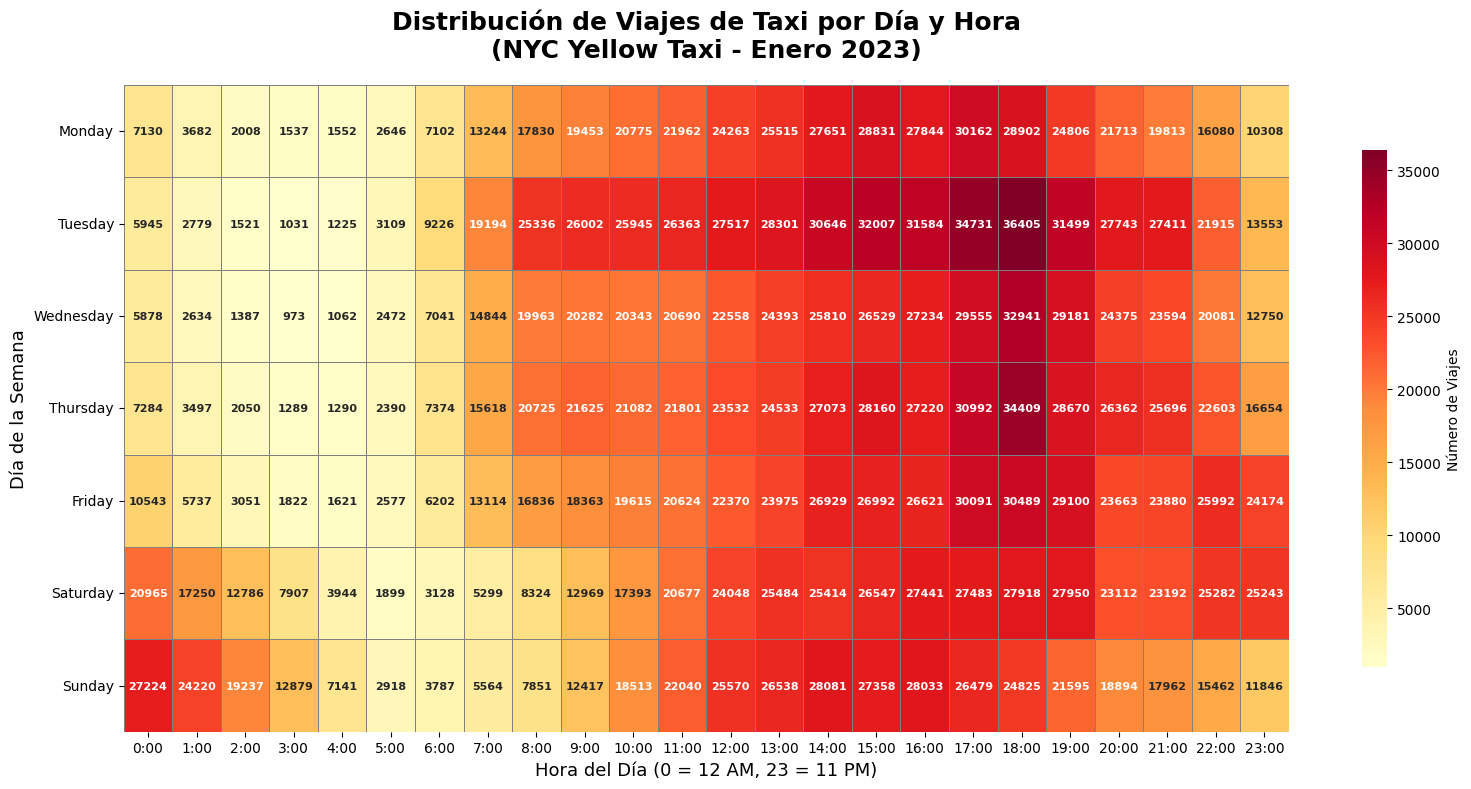

In [17]:
# Orden correcto de días (lunes a domingo)
orden_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Día_Semana'] = pd.Categorical(df['Día_Semana'], categories=orden_dias, ordered=True)

# Tabla pivote con conteo
pivot_table = df.pivot_table(
    index='Día_Semana',
    columns='Hora_Recogida',
    values='ID_Proveedor',
    aggfunc='count',
    fill_value=0
)

# Asegurar todas las horas
pivot_table = pivot_table.reindex(columns=range(24), fill_value=0)

# Mapa de calor profesional
plt.figure(figsize=(16, 8))
sns.heatmap(
    pivot_table,
    cmap='YlOrRd',
    annot=True,
    fmt='d',
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Número de Viajes', 'shrink': 0.8},
    annot_kws={'fontsize': 8, 'fontweight': 'bold'}
)

# Títulos y etiquetas
plt.title('Distribución de Viajes de Taxi por Día y Hora\n(NYC Yellow Taxi - Enero 2023)',
          fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Hora del Día (0 = 12 AM, 23 = 11 PM)', fontsize=13)
plt.ylabel('Día de la Semana', fontsize=13)

# Etiquetas de horas
plt.xticks(ticks=[i + 0.5 for i in range(24)], labels=[f'{h}:00' for h in range(24)], rotation=0)
plt.yticks(rotation=0)

# Ajustar
plt.tight_layout()

# Guardar
plt.savefig('/content/mapa_calor_viajes_mejorado.png', dpi=300, bbox_inches='tight')
plt.show()

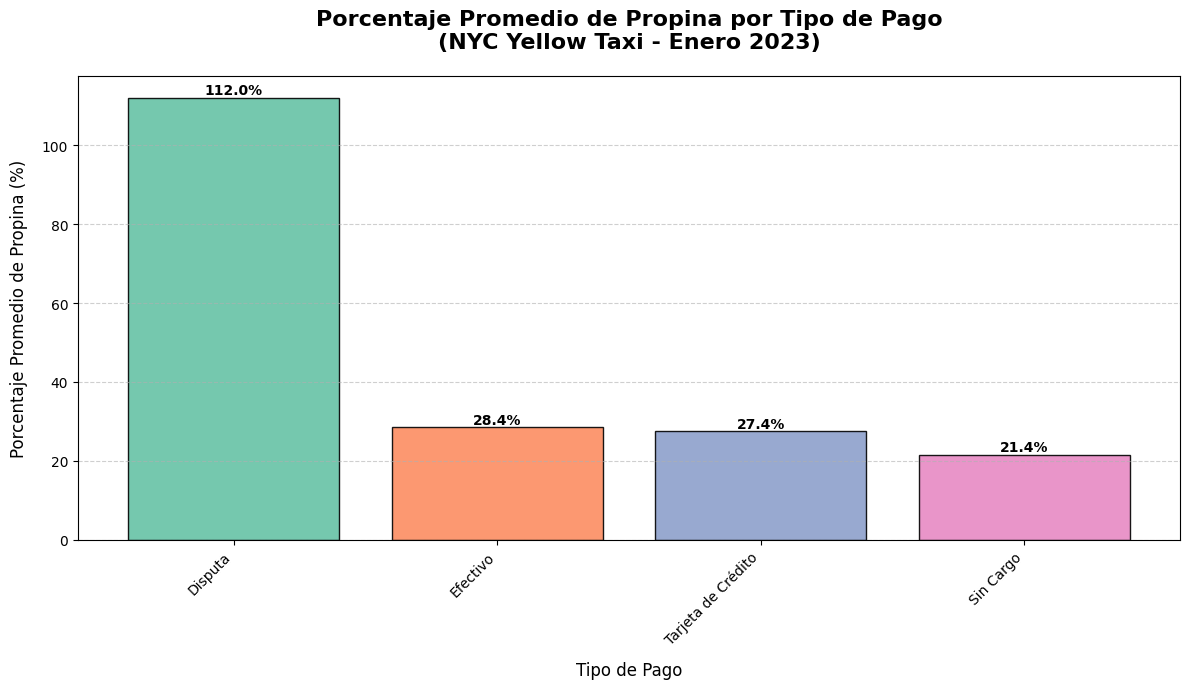

Porcentaje promedio de propina por tipo de pago:
Tipo_Pago_Descriptivo
Disputa               112.0
Efectivo               28.4
Tarjeta de Crédito     27.4
Sin Cargo              21.4
Name: Porcentaje_Propina, dtype: float64


In [18]:

# --- Calcular porcentaje de propina ---
# Asegurar que no haya división por cero
df['Porcentaje_Propina'] = np.where(df['Monto_Tarifa'] > 0,
                                   (df['Monto_Propina'] / df['Monto_Tarifa']) * 100,
                                   0)

# --- Filtrar viajes con propinas válidas ---
df_propinas = df[(df['Monto_Propina'] > 0) & (df['Monto_Tarifa'] > 0)].copy()

# --- Mapear Tipo_Pago a etiquetas descriptivas ---
# Basado en NYC Yellow Taxi: 1=Crédito, 2=Efectivo, 3=Sin cargo, 4=Disputa, 5=Desconocido, 6=Anulado
tipo_pago_map = {
    1: 'Tarjeta de Crédito',
    2: 'Efectivo',
    3: 'Sin Cargo',
    4: 'Disputa',
    5: 'Desconocido',
    6: 'Viaje Anulado'
}
df_propinas['Tipo_Pago_Descriptivo'] = df_propinas['Tipo_Pago'].map(tipo_pago_map)

# --- Calcular promedio de propinas por tipo de pago ---
propinas_por_pago = df_propinas.groupby('Tipo_Pago_Descriptivo')['Porcentaje_Propina'].mean().sort_values(ascending=False)

# --- Crear gráfico profesional ---
plt.figure(figsize=(12, 7))

# Paleta de colores moderna
colors = sns.color_palette("Set2", len(propinas_por_pago))

# Gráfico de barras
bars = plt.bar(propinas_por_pago.index, propinas_por_pago.values,
               color=colors, edgecolor='black', linewidth=1, alpha=0.9)

# Añadir etiquetas numéricas en las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.2,
             f'{height:.1f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Títulos y etiquetas
plt.title('Porcentaje Promedio de Propina por Tipo de Pago\n(NYC Yellow Taxi - Enero 2023)',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Tipo de Pago', fontsize=12, labelpad=10)
plt.ylabel('Porcentaje Promedio de Propina (%)', fontsize=12, labelpad=10)

# Rotar etiquetas del eje X para mejor legibilidad
plt.xticks(rotation=45, ha='right', fontsize=10)

# Cuadrícula para mejor lectura
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Ajustar diseño
plt.tight_layout()

# Guardar en alta calidad
plt.savefig('/content/propinas_por_pago_mejorado.png', dpi=300, bbox_inches='tight')
plt.show()

# --- Mostrar datos numéricos para referencia ---
print("Porcentaje promedio de propina por tipo de pago:")
print(propinas_por_pago.round(1))


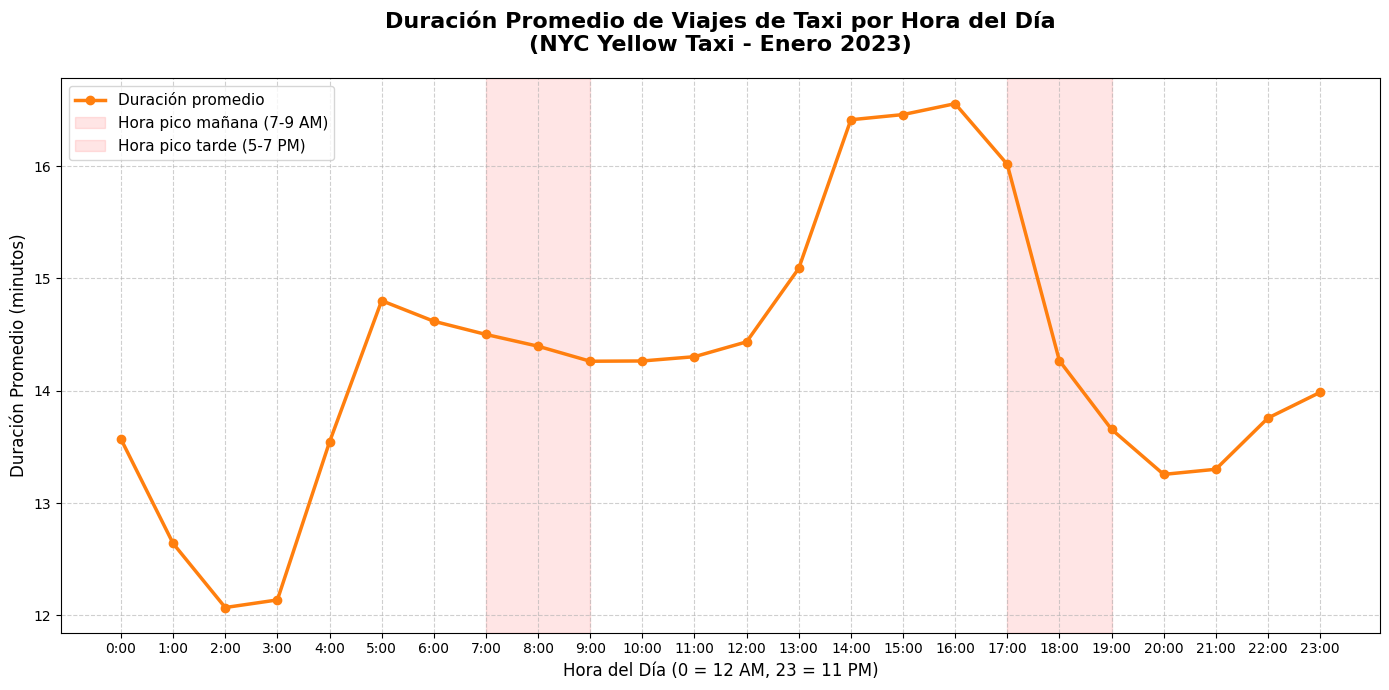

In [19]:
# --- ANÁLISIS DE DURACIÓN PROMEDIO DE VIAJES POR HORA ---

# 1. Calcular la duración del viaje en minutos
df['Duración_Viaje'] = (df['Fecha_Hora_Finalización'] - df['Fecha_Hora_Recogida']).dt.total_seconds() / 60

# 2. Filtrar viajes con duración razonable (evitar valores negativos o extremos)
# Ejemplo: duración entre 1 minuto y 3 horas (180 min)
df_filtrado = df[(df['Duración_Viaje'] > 1) & (df['Duración_Viaje'] <= 180)].copy()

# 3. Calcular el promedio de duración por hora de recogida
duracion_promedio_por_hora = df_filtrado.groupby('Hora_Recogida')['Duración_Viaje'].mean()

# 4. Asegurar que todas las horas de 0 a 23 estén presentes (incluso si no hay datos)
duracion_promedio_por_hora = duracion_promedio_por_hora.reindex(range(0, 24), fill_value=0)

# 5. Crear el gráfico profesional
plt.figure(figsize=(14, 7))
plt.plot(duracion_promedio_por_hora.index, duracion_promedio_por_hora.values,
         marker='o', linewidth=2.5, markersize=6, color='#ff7f0e', label='Duración promedio')

# Personalización del gráfico
plt.title('Duración Promedio de Viajes de Taxi por Hora del Día\n(NYC Yellow Taxi - Enero 2023)',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Hora del Día (0 = 12 AM, 23 = 11 PM)', fontsize=12)
plt.ylabel('Duración Promedio (minutos)', fontsize=12)

# Etiquetas en el eje X: cada hora
plt.xticks(ticks=range(0, 24), labels=[f'{h}:00' for h in range(24)], rotation=0, fontsize=10)

# Líneas de referencia (opcional): hora pico de tráfico
plt.axvspan(7, 9, color='red', alpha=0.1, label='Hora pico mañana (7-9 AM)')
plt.axvspan(17, 19, color='red', alpha=0.1, label='Hora pico tarde (5-7 PM)')

# Cuadrícula para mejor lectura
plt.grid(True, linestyle='--', alpha=0.6)

# Leyenda
plt.legend(fontsize=11)

# Ajustar diseño
plt.tight_layout()

# Guardar en alta calidad
plt.savefig('/content/duracion_viajes_mejorado.png', dpi=300, bbox_inches='tight')
plt.show()

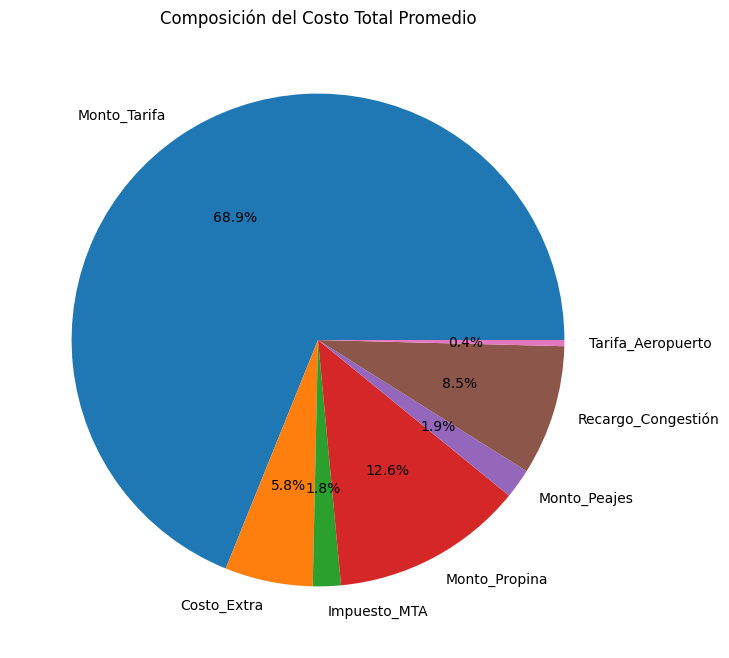

In [20]:
# Desglosar componentes del costo
componentes = ['Monto_Tarifa', 'Costo_Extra', 'Impuesto_MTA', 'Monto_Propina', 'Monto_Peajes', 'Recargo_Congestión', 'Tarifa_Aeropuerto']
costos_promedio = df[componentes].mean()

# Gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(costos_promedio, labels=componentes, autopct='%1.1f%%', colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2'])
plt.title('Composición del Costo Total Promedio')
plt.savefig('/content/costos_pie.png')
plt.show()

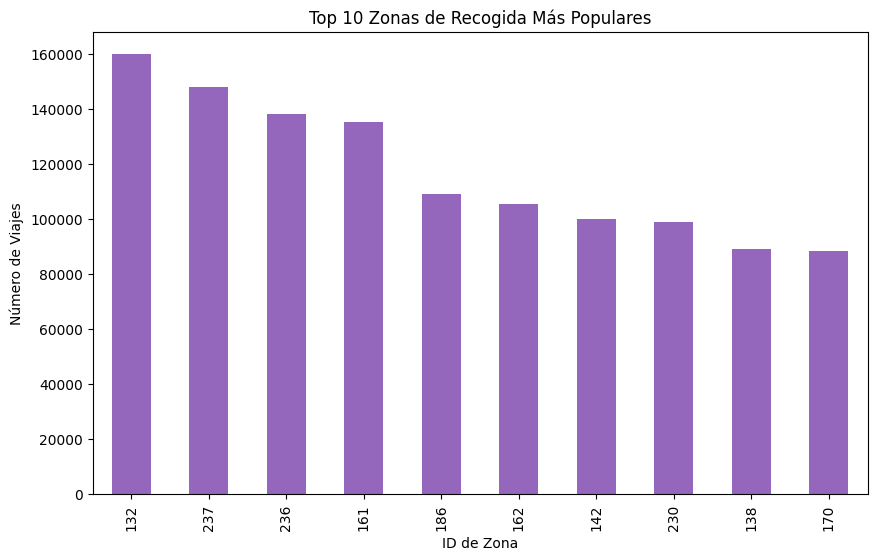

In [21]:
# Contar viajes por zona de recogida
zonas_populares = df['ID_Zona_Recogida'].value_counts().head(10)

# Gráfico de barras
plt.figure(figsize=(10, 6))
zonas_populares.plot(kind='bar', color='#9467bd')
plt.title('Top 10 Zonas de Recogida Más Populares')
plt.xlabel('ID de Zona')
plt.ylabel('Número de Viajes')
plt.savefig('/content/zonas_populares.png')
plt.show()

In [22]:



# Asegurar que Duración_Viaje está calculada (código de respaldo si no lo tienes)
if 'Duración_Viaje' not in df.columns:
    mask = df['Fecha_Hora_Recogida'].notna() & df['Fecha_Hora_Finalización'].notna()
    df.loc[mask, 'Duración_Viaje'] = (
        (df.loc[mask, 'Fecha_Hora_Finalización'] - df.loc[mask, 'Fecha_Hora_Recogida'])
        .dt.total_seconds() / 60
    )
    df.loc[~mask, 'Duración_Viaje'] = np.nan

# Filtrar viajes válidos
df_valid = df[(df['Duración_Viaje'] > 1) & (df['Duración_Viaje'] <= 180) &
              (df['Distancia_Viaje'] > 0)].copy()

# Calcular métricas por zona de recogida
df_valid['Velocidad_Promedio'] = (df_valid['Distancia_Viaje'] / df_valid['Duración_Viaje']) * 60  # mph

zonas_stats = df_valid.groupby('ID_Zona_Recogida').agg({
    'Duración_Viaje': ['mean', 'count'],
    'Velocidad_Promedio': 'mean'
}).round(2)

zonas_stats.columns = ['Duracion_Promedio_Min', 'Num_Viajes', 'Velocidad_Promedio_Mph']
zonas_stats = zonas_stats[zonas_stats['Num_Viajes'] >= 100]  # Mínimo 100 viajes para representatividad

# Top 10 zonas más lentas (mayor duración promedio)
zonas_lentas = zonas_stats.sort_values('Duracion_Promedio_Min', ascending=False).head(10)

# Top 10 zonas más rápidas (menor duración promedio)
zonas_rapidas = zonas_stats.sort_values('Duracion_Promedio_Min', ascending=True).head(10)

# Mostrar resultados
print("=== TOP 10 ZONAS MÁS LENTAS (Mayor Duración Promedio) ===")
print(zonas_lentas)

print("\n=== TOP 10 ZONAS MÁS RÁPIDAS (Menor Duración Promedio) ===")
print(zonas_rapidas)

print(f"\nEstadísticas generales:")
print(f"- Total de zonas analizadas: {len(zonas_stats)}")
print(f"- Duración promedio general: {df_valid['Duración_Viaje'].mean():.1f} minutos")
print(f"- Velocidad promedio general: {df_valid['Velocidad_Promedio'].mean():.1f} mph")

=== TOP 10 ZONAS MÁS LENTAS (Mayor Duración Promedio) ===
                  Duracion_Promedio_Min  Num_Viajes  Velocidad_Promedio_Mph
ID_Zona_Recogida                                                           
86                                54.91         100                   15.06
55                                46.70         124                   17.73
51                                39.27         202                   16.14
254                               38.89         122                   15.67
39                                38.82         357                   18.14
165                               38.29         103                    9.18
14                                38.00         148                  213.05
235                               36.93         150                   18.51
91                                36.46         164                   10.35
132                               35.96      154934                   27.65

=== TOP 10 ZONAS MÁS RÁPIDAS 